In [1]:
import pandas as pd

Loading data

In [3]:


print("Loading data...")
data = pd.read_csv("C:/Users/mahes/OneDrive/Desktop/EEG DATASET/emotions.csv")
print("Data loaded successfully.\n")


Loading data...
Data loaded successfully.



In [4]:
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_74

In [4]:
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


seprating features and labels

In [6]:
X = data.drop('label', axis=1)
y = data['label']
print("Features shape:", X.shape)
print("Labels shape:", y.shape)


Features shape: (2132, 2548)
Labels shape: (2132,)


In [29]:
import matplotlib.pyplot as plt


Plotting sample features (fft_0_b to fft_749_b)...


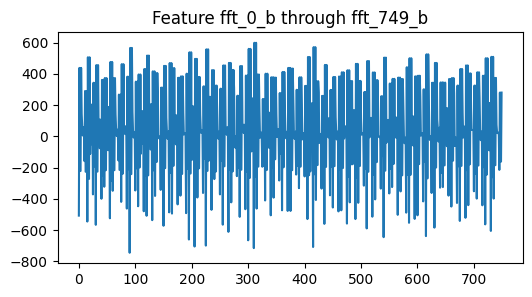

In [8]:

print("\nPlotting sample features (fft_0_b to fft_749_b)...")
sample = data.loc[0, 'fft_0_b':'fft_749_b']
plt.figure(figsize=(6, 3))
plt.plot(range(len(sample)), sample)
plt.title('Feature fft_0_b through fft_749_b')
plt.show()



Plotting EEG signal for sample index 6...


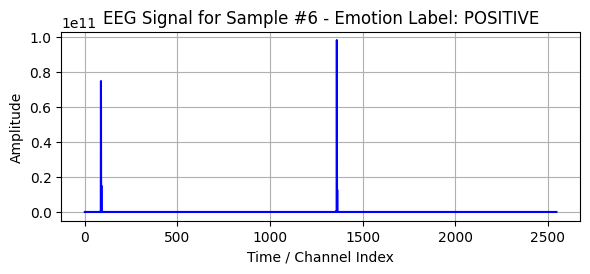

In [9]:
sample_index = 6
print(f"\nPlotting EEG signal for sample index {sample_index}...")

plt.figure(figsize=(6, 3))
plt.plot(X.iloc[sample_index].values, color='blue')
plt.title(f'EEG Signal for Sample #{sample_index} - Emotion Label: {y.iloc[sample_index]}')
plt.xlabel('Time / Channel Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()


Label encoding and one Hot encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [13]:
print("\nEncoding labels...")
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)




Encoding labels...


In [14]:
print("Unique classes:", label_encoder.classes_)
print("Encoded labels shape:", y_categorical.shape)

Unique classes: ['NEGATIVE' 'NEUTRAL' 'POSITIVE']
Encoded labels shape: (2132, 3)


Spliting and Training and Testing dataset

In [15]:
from sklearn.model_selection import train_test_split


In [16]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y
)

Print shapes

In [ ]:


print("\nShapes after splitting:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Shapes after splitting:
X_train shape: (1705, 2548)
X_test shape: (427, 2548)
y_train shape: (1705, 3)
y_test shape: (427, 3)


Print counts

In [ ]:

print("\nNumber of training samples:", len(X_train))
print("Number of testing samples:", len(X_test))


Number of training samples: 1705
Number of testing samples: 427


 Display a few rows from training and testing sets

Trainig data

In [ ]:

print("\nSample rows from X_train:")
print(X_train.head())



Sample rows from X_train:
      # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  \
895        13.40      19.0    -330.0      4.41      25.5        3.73   
998         7.35      32.7    -262.0     18.90      27.4      -15.70   
1318       15.50      28.1    -168.0     15.10      26.6        2.78   
1216        8.57      29.1      15.9      6.69      21.9       -1.89   
321        32.10      32.0      28.8     31.00      22.9        4.25   

      mean_d_1_a  mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_740_b  \
895        1.280        3.76       4.280       2.290  ...     -910.0   
998        2.500      -21.00       1.700       1.380  ...      225.0   
1318      -0.198       19.80       3.390       1.100  ...      -39.0   
1216       0.222        2.21      -0.487      -2.240  ...       50.0   
321        0.787        5.92       4.580      -0.199  ...      178.0   

      fft_741_b  fft_742_b  fft_743_b  fft_744_b  fft_745_b  fft_746_b  \
895      729.00    -314.00    -31

In [ ]:
print("\nCorresponding y_train rows (one-hot encoded):")
print(y_train[:5])  



Corresponding y_train rows (one-hot encoded):
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


Testing data

In [23]:
print("\nSample rows from X_test:")
print(X_test.head())



Sample rows from X_test:
      # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  \
595         9.74      21.4      26.6      1.17      26.2      76.000   
1443        2.88      31.9    -260.0     15.00      28.2      12.200   
1440       14.40      25.8    -179.0     10.10      26.8      -3.200   
1278       29.20      30.5      32.5     28.50      24.9      -0.296   
908        -1.31      27.8    -486.0     12.50      25.4       2.960   

      mean_d_1_a  mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_740_b  \
595      -15.700       -5.94       86.40        8.70  ...      139.0   
1443      -2.750       79.90       -9.95        1.06  ...     -425.0   
1440       1.540       13.10        1.01        2.24  ...       74.8   
1278      -0.952        4.95       -2.06       -4.26  ...       85.6   
908       -1.490       28.80        2.37        2.69  ...     -538.0   

      fft_741_b  fft_742_b  fft_743_b  fft_744_b  fft_745_b  fft_746_b  \
595       12.00       8.78       8

In [24]:
print("\nCorresponding y_test rows (one-hot encoded):")
print(y_test[:5])


Corresponding y_test rows (one-hot encoded):
[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


Feature Scaling

In [25]:
from sklearn.preprocessing import  StandardScaler

In [26]:
print("\nScaling features...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed.")


Scaling features...
Feature scaling completed.


Print a few rows to check scaled values

In [27]:
import pandas as pd

Convert to DataFrame to view better 

In [ ]:

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

After Scaling

In [29]:
print("\nFirst 3 rows of scaled training data:")
print(X_train_scaled_df.head(3))


First 3 rows of scaled training data:
   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0   -0.122536 -0.822216 -1.107806 -0.534692  0.086772    0.200241    0.126947   
1   -0.507314  0.591900 -0.775456  0.308100  0.220622   -0.831640    0.257731   
2    0.011023  0.117087 -0.316030  0.087078  0.164264    0.149789   -0.031494   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_740_b  fft_741_b  fft_742_b  \
0    0.049760    0.255751    0.132971  ...  -3.045197   2.979617  -2.362233   
1   -0.286195    0.107789    0.082284  ...   0.837104  -0.505597   0.918497   
2    0.267398    0.204710    0.066688  ...  -0.065916   0.055068   0.012203   

   fft_743_b  fft_744_b  fft_745_b  fft_746_b  fft_747_b  fft_748_b  fft_749_b  
0  -2.362233   2.979617  -0.093208   0.179803   0.179880   0.179880   0.179803  
1   0.918497  -0.505597  -1.966144   1.936803  -1.002478  -1.002478   1.936803  
2   0.012203   0.055068  -1.036139   1.137715  -1.132919  -1.132919   1.1377

Reshaping it for LSTM

Reshape the input for LSTM [samples, timesteps, features]

In [32]:
print("\nReshaping data for LSTM...")


X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)


Reshaping data for LSTM...


In [33]:
print("X_train_lstm shape:", X_train_lstm.shape)
print("X_test_lstm shape :", X_test_lstm.shape)

X_train_lstm shape: (1705, 2548, 1)
X_test_lstm shape : (427, 2548, 1)


In [34]:

print("\nSample reshaped input for LSTM (1st training sample):")
print(X_train_lstm[0][:10])



Sample reshaped input for LSTM (1st training sample):
[[-0.12253617]
 [-0.8222156 ]
 [-1.10780646]
 [-0.5346917 ]
 [ 0.0867717 ]
 [ 0.20024138]
 [ 0.1269473 ]
 [ 0.04976005]
 [ 0.25575123]
 [ 0.13297139]]


LSTM Model Construction

In [39]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

In [ ]:

model = Sequential([
    LSTM(128, input_shape=(X_train_lstm.shape[1], 1), return_sequences=True),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')
])
model.summary()

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 2548, 128)      │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2548, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,323 (470.01 KB)

 Trainable params: 120,323 (470.01 KB)

 Non-trainable params: 0 (0.00 B)

Compile model


In [ ]:

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Early Stopping

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


Traing Model


In [ ]:

history = model.fit(
    X_train_lstm, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    shuffle=True
)


Epoch 1/50


43/43 ━━━━━━━━━━━━━━━━━━━━ 156s 4s/step - accuracy: 0.5345 - loss: 0.9983 - val_accuracy: 0.6100 - val_loss: 0.7299
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 158s 4s/step - accuracy: 0.6361 - loss: 0.7057 - val_accuracy: 0.6276 - val_loss: 0.9775
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 179s 4s/step - accuracy: 0.6589 - loss: 0.7589 - val_accuracy: 0.6862 - val_loss: 0.6675
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 174s 4s/step - accuracy: 0.7193 - loss: 0.6257 - val_accuracy: 0.7947 - val_loss: 0.5568
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 205s 4s/step - accuracy: 0.8288 - loss: 0.5015 - val_accuracy: 0.8240 - val_loss: 0.5163
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 176s 4s/step - accuracy: 0.7693 - loss: 0.6003 - val_accuracy: 0.6276 - val_loss: 0.7625
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 166s 4s/step - accuracy: 0.7031 - loss: 0.6769 - val_accuracy: 0.8504 - val_loss: 0.5158
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 204s 4s/step - accuracy: 0.8260 - loss: 0.5387 - val_accuracy: 0.6129 - val_loss: 0.

Evaluate Model

In [ ]:

loss, accuracy = model.evaluate(X_test_lstm, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 976ms/step - accuracy: 0.8895 - loss: 0.3129

Test Accuracy: 0.8759


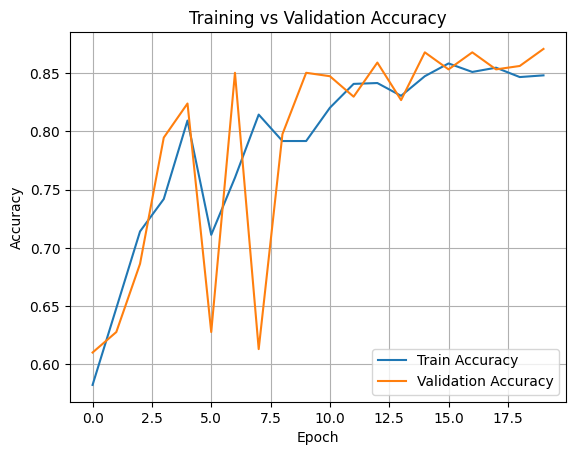

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np


Predictions & Metrics

In [ ]:

y_pred_probs = model.predict(X_test_lstm)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)
class_names = label_encoder.classes_

14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

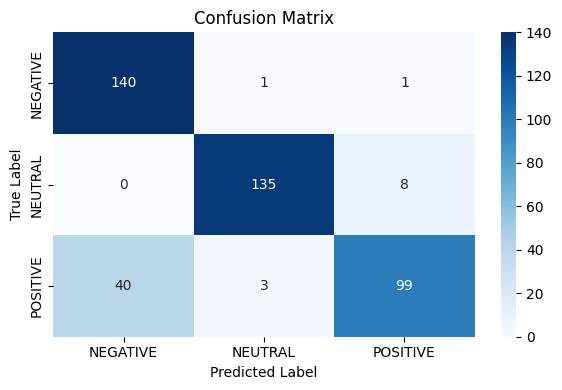

In [50]:

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

Classification Report

In [51]:
from sklearn.metrics import classification_report

In [ ]:

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

Classification Report:

              precision    recall  f1-score   support

    NEGATIVE       0.78      0.99      0.87       142
     NEUTRAL       0.97      0.94      0.96       143
    POSITIVE       0.92      0.70      0.79       142

    accuracy                           0.88       427
   macro avg       0.89      0.88      0.87       427
weighted avg       0.89      0.88      0.87       427



In [53]:
model.save('eeg_LSTM_emotion_model.h5')